In [1]:
import os
import cv2
import keras
import numpy as np
import tensorflow as tf
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, BatchNormalization, Input,Conv2DTranspose, Add, Activation, LeakyReLU

In [2]:
def RCNN_Model_Block(input_size = (256,256,1), filters=64, kernal=3):
    inputs = Input(input_size)

    # Conv Layer to set the shape for reuse
    conv1 = Conv2D(filters, 1, padding='same', kernel_initializer='he_normal', trainable=False)
    
    #Reusable Convolutional Layer
    R1 = Conv2D(filters, kernal, padding='same', kernel_initializer='he_normal')
       
    #Shape inital tensor
    conv1out = conv1(inputs)
    
    conv1out = R1(conv1out)
    conv1out = BatchNormalization()(conv1out)
    conv1out = Activation(activation='relu')(conv1out)

    conv2out = R1(conv1out)
    conv2out = Add()([conv2out, conv1out])
    conv2out = BatchNormalization()(conv2out)
    conv2out = Activation(activation='relu')(conv2out)

    conv3out = R1(conv2out)
    conv3out = Add()([conv3out, conv1out])
    conv3out = BatchNormalization()(conv3out)
    conv3out = Activation(activation='relu')(conv3out)

    conv4out = R1(conv3out)
    conv4out = Add()([conv4out, conv1out])
    conv4out = BatchNormalization()(conv4out)
    conv4out = Activation(activation='relu')(conv4out)

    conv5out = R1(conv4out)
    conv5out = Add()([conv5out, conv1out])
    model = Model(inputs, conv5out)
    return model

model = RCNN_Model_Block()

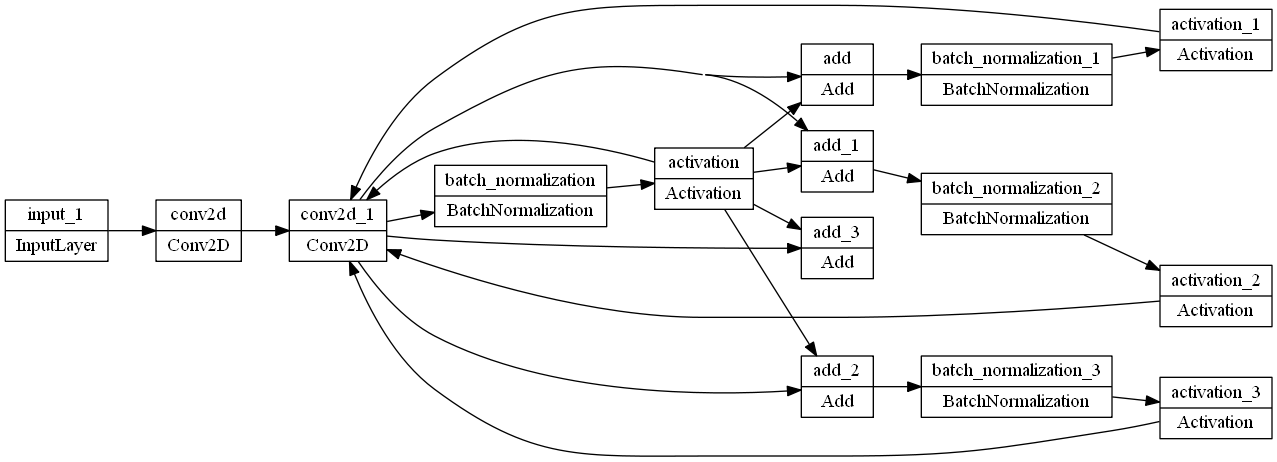

In [3]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=False, show_layer_names=True, rankdir='LR', expand_nested=False, dpi=96
)